<a href="https://colab.research.google.com/github/junggangwo/pdm07/blob/main/py-tensorflow/DL1-FCN/mnist05_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [4]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [5]:
fcn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1894 - accuracy: 0.9452 - val_loss: 0.1276 - val_accuracy: 0.9617
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.1047 - val_accuracy: 0.9686
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1187 - accuracy: 0.9654 - val_loss: 0.0904 - val_accuracy: 0.9731
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9695 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0909 - accuracy: 0.9725 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.0797 - val_accuracy: 0.9759
Epoch 

In [7]:
fcn2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9796


[0.0672605037689209, 0.9796000123023987]

## **FCN3**

In [8]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 벡터로 바꿔줌
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [9]:
fcn3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [10]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3509 - accuracy: 0.8951 - val_loss: 0.1301 - val_accuracy: 0.9599
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1498 - accuracy: 0.9556 - val_loss: 0.0937 - val_accuracy: 0.9706
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1108 - accuracy: 0.9669 - val_loss: 0.0804 - val_accuracy: 0.9756
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0874 - accuracy: 0.9734 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0755 - accuracy: 0.9760 - val_loss: 0.0718 - val_accuracy: 0.9767
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9785 - val_loss: 0.0649 - val_accuracy: 0.9809
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0593 - accuracy: 0.9808 - val_loss: 0.0663 - val_accuracy: 0.9796
Epoch 

In [11]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9850


[0.06294956803321838, 0.9850000143051147]

## **FCN4**

In [12]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
fcn4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [14]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.4134 - accuracy: 0.8760 - val_loss: 0.1458 - val_accuracy: 0.9557
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1757 - accuracy: 0.9502 - val_loss: 0.1069 - val_accuracy: 0.9668
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1326 - accuracy: 0.9618 - val_loss: 0.0921 - val_accuracy: 0.9721
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1113 - accuracy: 0.9675 - val_loss: 0.0789 - val_accuracy: 0.9772
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0960 - accuracy: 0.9726 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0815 - accuracy: 0.9762 - val_loss: 0.0719 - val_accuracy: 0.9781
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0719 - accuracy: 0.9785 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 

In [15]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9832


[0.07064220309257507, 0.9832000136375427]

## **FCN5**

In [16]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
fcn5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

In [18]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.5934 - accuracy: 0.8191 - val_loss: 0.1671 - val_accuracy: 0.9520
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2292 - accuracy: 0.9406 - val_loss: 0.1177 - val_accuracy: 0.9670
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1775 - accuracy: 0.9550 - val_loss: 0.1006 - val_accuracy: 0.9726
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1427 - accuracy: 0.9634 - val_loss: 0.0941 - val_accuracy: 0.9747
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1284 - accuracy: 0.9667 - val_loss: 0.0883 - val_accuracy: 0.9771
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1084 - accuracy: 0.9725 - val_loss: 0.0834 - val_accuracy: 0.9774
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1013 - accuracy: 0.9734 - val_loss: 0.0797 - val_accuracy: 0.9789
Epoch 

In [19]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9829


[0.0785391628742218, 0.9829000234603882]

# **[DIY] Hidden layer에 따른 정확도**

In [20]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9829


[0.0785391628742218, 0.9829000234603882]

In [21]:
fcn_result = [[0.0685, 0.9811], 
 [0.0653, 0.9833], 
 [0.0737, 0.9817], 
 [0.0828, 0.9827]]

In [22]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9811, 0.9833, 0.9817, 0.9827]

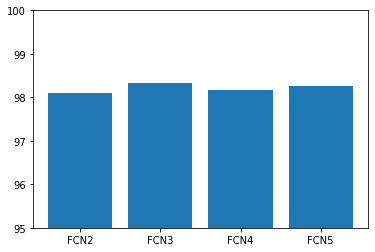

In [23]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((95,100))  # 주석 해제하면 그래프의 구분이 뚜렷해짐
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [24]:
fcn3.save('fcn3_best.hdf5')

In [25]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9850


[0.06294956803321838, 0.9850000143051147]

---